In [1]:
# -*- coding: utf-8 -*- 
import sys,os,logging,time,json,cv2,json,threading,uuid,logging,cv2,datetime
from IPython.display import Image
from IPython.core.display import HTML
import numpy as np
import random
from matplotlib import pyplot as plt
import numpy as np
import cv2
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
%matplotlib inline
g_root_path = "/Users/JimXie/Desktop/AI-training/demo/C3/"

Instructions for updating:
non-resource variables are not supported in the long term


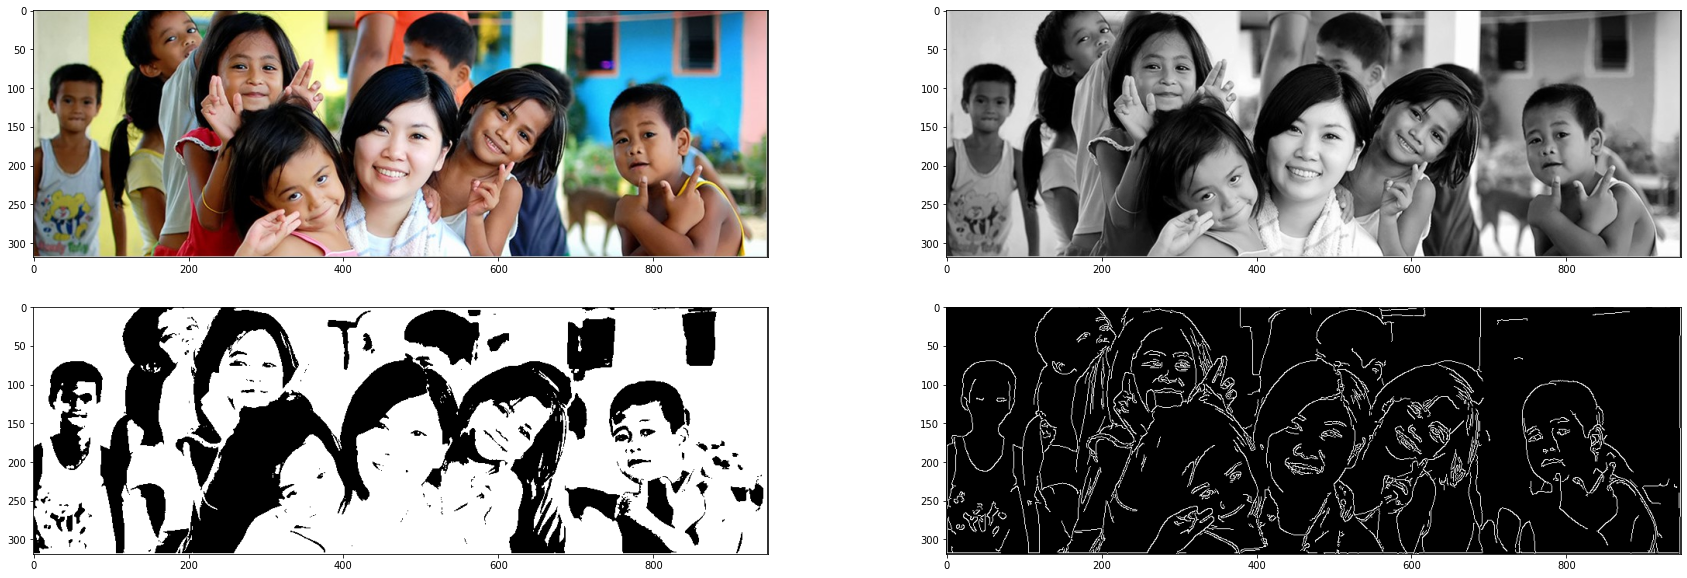

In [2]:
img= cv2.imread(g_root_path+'images/trend.jpg')
image= cv2.cvtColor(img.copy(),cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(image.copy(),cv2.COLOR_RGB2GRAY)
edge = cv2.Canny(gray.copy(),128,255)
ret, binary = cv2.threshold(gray.copy(), 80, 255, cv2.THRESH_BINARY)
binary = cv2.bitwise_not(binary)
blur = cv2.GaussianBlur(gray.copy(),(5,5),3)

fig,ax = plt.subplots(2,2,figsize=(30,10))
plt.subplot(2,2,1)
plt.imshow(image)
plt.subplot(2,2,2)
plt.imshow(gray,cmap='gray')
plt.subplot(2,2,3)
plt.imshow(binary,cmap=plt.get_cmap('binary'))
plt.subplot(2,2,4)
plt.imshow(edge,cmap='gray')

In [3]:
def print_img(img):
    mat = "{:1}"
    count = 0
    for y in range(len(img)):
        for x in range(len(img[y])):
            if not count % 8:
                print("\n")
            print(mat.format("["),end=' ')
            for j in range(len(img[y][x])):
                t = "%03d"%img[y][x][j]
                msg = "%-3s"%str(t)
                print(mat.format(msg),end=' ')
            print(mat.format("]"),end=' ')
            count = count + 1
        if count > 32 :
            break

In [4]:
def print_gray(gray):
    mat = "{:1}"
    count = 0
    for y in range(len(gray)):
        for x in range(len(gray[y])):
            if not count % 12:
                print("\n")
            t = "[%03d]"%gray[y][x]
            msg = "%-3s"%str(t)
            #print(msg,end=' ')
            print(mat.format(msg),end=' ')
            count = count + 1
        if count > 32:
            break

In [5]:
file_name = g_root_path+"images/5.jpg"
img = cv2.imread(file_name)
gray=cv2.cvtColor(img.copy(),cv2.COLOR_BGR2GRAY)
img.shape

(28, 28, 3)

In [6]:
print_img(img)



[ 000 000 000 ] [ 000 000 000 ] [ 000 000 000 ] [ 000 000 000 ] [ 000 000 000 ] [ 000 000 000 ] [ 000 000 000 ] [ 000 000 000 ] 

[ 000 000 000 ] [ 000 000 000 ] [ 002 002 002 ] [ 000 000 000 ] [ 000 000 000 ] [ 002 002 002 ] [ 001 001 001 ] [ 000 000 000 ] 

[ 001 001 001 ] [ 000 000 000 ] [ 000 000 000 ] [ 002 002 002 ] [ 000 000 000 ] [ 002 002 002 ] [ 000 000 000 ] [ 001 001 001 ] 

[ 000 000 000 ] [ 000 000 000 ] [ 000 000 000 ] [ 000 000 000 ] [ 000 000 000 ] [ 000 000 000 ] [ 000 000 000 ] [ 000 000 000 ] 

[ 000 000 000 ] [ 000 000 000 ] [ 000 000 000 ] [ 000 000 000 ] [ 002 002 002 ] [ 000 000 000 ] [ 000 000 000 ] [ 001 001 001 ] 

[ 001 001 001 ] [ 000 000 000 ] [ 000 000 000 ] [ 000 000 000 ] [ 001 001 001 ] [ 000 000 000 ] [ 000 000 000 ] [ 000 000 000 ] 

[ 002 002 002 ] [ 000 000 000 ] [ 000 000 000 ] [ 000 000 000 ] [ 000 000 000 ] [ 000 000 000 ] [ 000 000 000 ] [ 000 000 000 ] 

In [7]:
print_gray(gray)



[000] [000] [000] [000] [000] [000] [000] [000] [000] [000] [002] [000] 

[000] [002] [001] [000] [001] [000] [000] [002] [000] [002] [000] [001] 

[000] [000] [000] [000] [000] [000] [000] [000] [000] [000] [000] [000] 

[002] [000] [000] [001] [001] [000] [000] [000] [001] [000] [000] [000] 

[002] [000] [000] [000] [000] [000] [000] [000] 